# 1. Proceso de análisis y limpieza

## 1.1 Importamos las librerías básicas y el dataset

In [5]:
import pandas
import seaborn
import matplotlib.pyplot as pyplot
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [17]:
dataset = pandas.read_csv('bank-additional-full.csv', sep=';')

## 1.2 Empezamos a analizar nuestro dataset

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
dataset.shape

(41188, 21)

In [7]:
dataset.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [8]:
duplicates = dataset.duplicated().sum()
print('Cantidad de duplicados: ', duplicates)

Cantidad de duplicados:  12


In [9]:
dataset.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

## 1.3 Analizamos los valores de nuestras columnas CATEGÓRICAS y NUMÉRICAS

Obtenemos los nombres de las columnas categóricas y numéricas y los almacenamos en dos listas separadas para su posterior análisis

In [10]:
categoricals = []
numericals = []
for column in dataset.columns:
  if dataset[column].dtype == 'object':
    categoricals.append(column)
  elif dataset[column].dtype == 'int64' or dataset[column].dtype == 'float64':
    numericals.append(column)

### 1.3.1 Columnas categóricas

Analizamos sus valores e intentamos identificar si existe ruido, redunancia, valores en blanco, repetidos, missing values o errores tipográficos.

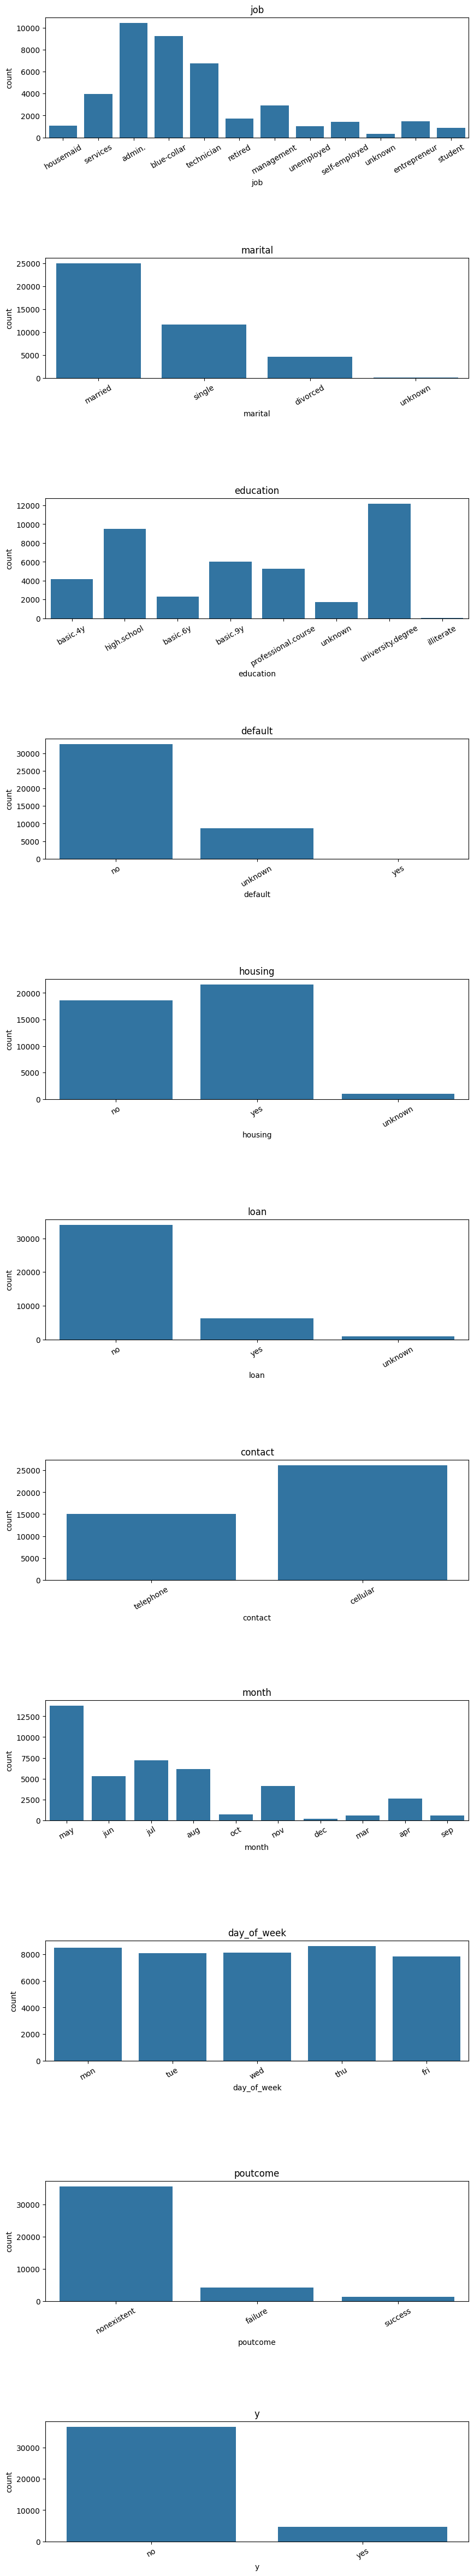

In [11]:
fig, ax = pyplot.subplots(nrows=len(categoricals), ncols=1, figsize=(10,60))
fig.subplots_adjust(hspace=1)

for index, column in enumerate(categoricals):
  seaborn.countplot(x=column, data=dataset, ax=ax[index])
  ax[index].set_title(column)
  ax[index].set_xticklabels(ax[index].get_xticklabels(),rotation=30)

Conclusión: No encontramos errores tipográficos ni blancos en las columnas del tipo categóricas. Sin embargo encontramos bastantes missing values con el valor "unknown".
Otras observaciones:
- jobs: Contiene missing values.
- month: Verificamos que los valores de ésta columna se encuentran dentro de los parámetros esperados (meses del año). No hay errores tipográficos.
- y: Columna a predecir. Apreciamos un importante desbalanceamiento de los datos (los trataremos más adelante)

### 1.3.2 Columnas numéricas

Utilizamos el método describe para ver valores estadísticos de las columnas numéricas y poder determinar qué tanta información (variación) encontramos en cada columna. Principalmente apreciariamos el desvio standar ya que nos indicaría el grado de variabilidad. Mientras más se acerque al 0 menos información nos aporta.

In [62]:
dataset.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


#### Revisamos outliers

Verificamos valores anómalos en las columnas numéricas

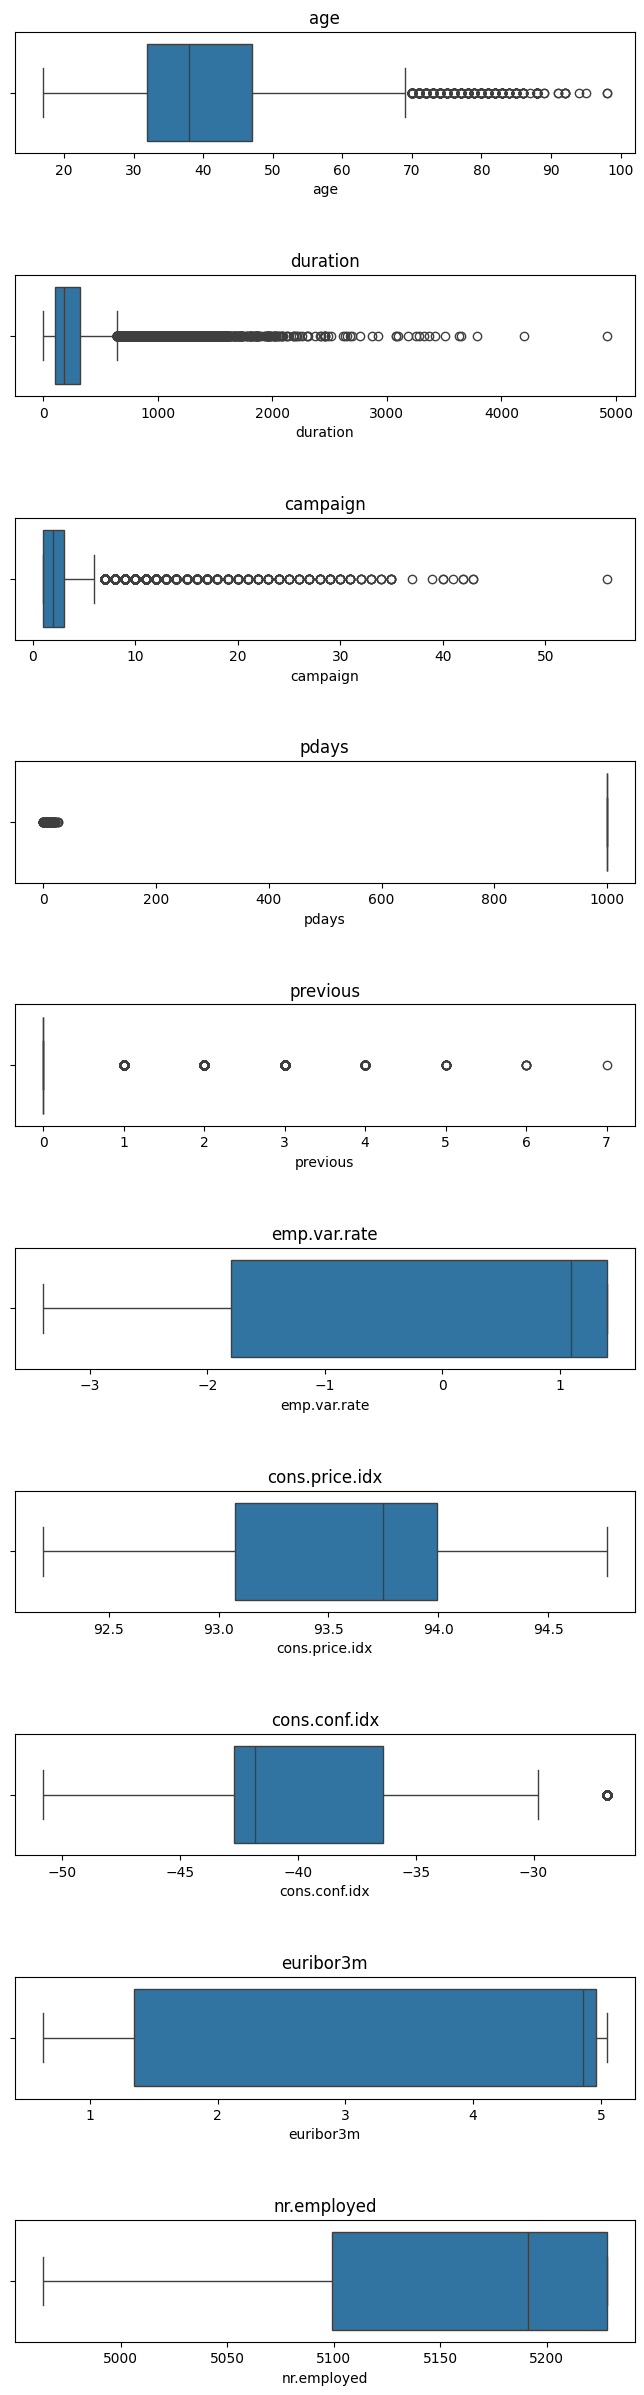

In [64]:
fig, ax = pyplot.subplots(nrows=len(numericals), ncols=1, figsize=(8,30))
fig.subplots_adjust(hspace=1)

for index, column in enumerate(numericals):
  seaborn.boxplot(x=column, data=dataset, ax=ax[index])
  ax[index].set_title(column)

- age: verificamos que las edades se encuentran en un rango aceptable, entre 15 y 100 años aprox.
- duration: no hay valores negativos. También dentro de valores aceptables pero para nuestro modelo predictivo no sirve ya que éste valor se conoce después de la respuesta del cliente
- campaign: dentro de los valores aceptables. No hay valores negativos
- pdays: parece que la mayoría de los valores se encuentran en 999. VAMOS A VERIFICAR A DETALLE ESTA
- emp.var.rate: la tasa de variación de empleo se encuentra dentro de los valores estipulados.
- cons.price.idx: los valores se encuentran dentro de lo estipulados.
- cons.conf.idx: los valores se encuentran dentro de lo estipulados.
- euribor3m: los valores se encuentran dentro de lo estipulados.
- nr.empleados: los valores se encuentran dentro de lo estipulados.

Text(0.5, 1.0, 'pdays')

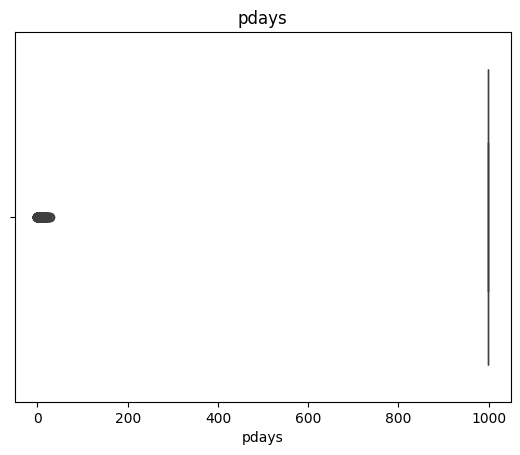

In [12]:
seaborn.boxplot(x=dataset['pdays'])
pyplot.title('pdays')

Text(0.5, 1.0, 'pdays')

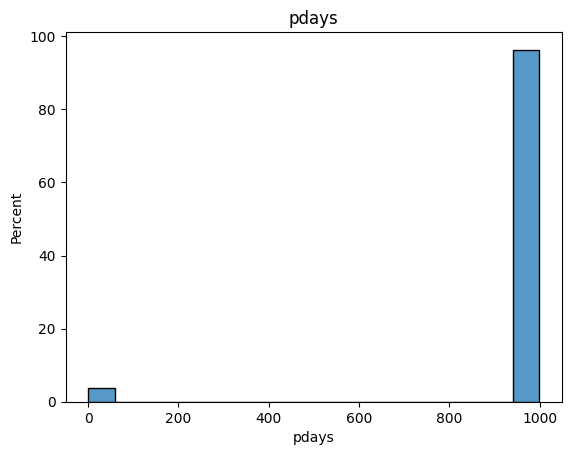

In [13]:
seaborn.histplot(data=dataset, x='pdays', stat='percent')
pyplot.title('pdays')

Conclusión: observamos que más del 95% de los datos tiene el valor 999 por lo tanto consideramos que ésta columna podría eliminarse.

### Limpiamos los datos según lo concluido

In [19]:
dataset = dataset.drop(['pdays', 'duration'], axis=1)

Limpieza de duplicados

In [21]:
dataset.drop_duplicates(inplace=True)

## 1.4 Análisis de correlación

### 1.4.1 Tratamiento de datos para el análisis

Convertimos los valores de nuestro dataset a valores del tipo numéricos para poder llevar a cabo el análisis de correlación

In [24]:
dictionarie = {'yes': 1, 'no': 0}
ynorm_dataset = dataset['y'].replace(dictionarie)
dummie_dataset = pandas.get_dummies(dataset.drop(['y'], axis=1), dtype=int)
normalized_dataset = pandas.concat([ynorm_dataset, dummie_dataset], axis=1)
normalized_dataset.head()

,y,age,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0,56,1,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,57,1,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,37,1,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,40,1,0,1.1,93.994,-36.4,4.857,5191.0,1,...,0,0,0,1,0,0,0,0,1,0
4,0,56,1,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0


In [25]:
corr_matx = normalized_dataset.corr()
corr_matx

,y,age,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
y,1.000000,0.028210,-0.072265,0.229124,-0.297883,-0.137248,0.057088,-0.307560,-0.353787,0.033536,...,0.136798,0.125545,-0.008213,-0.022077,0.015583,0.008918,0.005852,0.029993,-0.192529,0.315579
age,0.028210,1.000000,0.000917,0.022531,0.002035,0.000937,0.128852,0.012774,-0.015061,-0.097906,...,0.049502,0.040748,0.006676,0.018014,-0.019118,0.017603,-0.023031,-0.005280,-0.013984,0.035478
campaign,-0.072265,0.000917,1.000000,-0.084469,0.158134,0.128120,-0.014241,0.142324,0.152425,0.013408,...,-0.051124,-0.036052,0.025718,0.011991,0.007536,-0.024514,-0.020922,-0.073398,0.093583,-0.054361
previous,0.229124,0.022531,-0.084469,1.000000,-0.421818,-0.204493,-0.049686,-0.456039,-0.502377,0.020695,...,0.127472,0.157769,0.002843,-0.003189,0.002134,0.001271,-0.003005,0.679957,-0.877759,0.524153
emp.var.rate,-0.297883,0.002035,0.158134,-0.421818,1.000000,0.776755,0.187280,0.971940,0.905493,-0.028466,...,-0.213306,-0.170966,-0.014520,-0.016830,-0.008394,0.013843,0.026297,-0.382045,0.474543,-0.259061
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
day_of_week_tue,0.008918,0.017603,-0.024514,0.001271,0.013843,0.001220,0.050567,0.022203,0.009365,-0.000940,...,0.001782,0.003702,-0.240087,-0.252571,-0.252707,1.000000,-0.244250,-0.005016,0.000322,0.007834
day_of_week_wed,0.005852,-0.023031,-0.020922,-0.003005,0.026297,0.012290,0.024865,0.029457,0.021972,-0.003077,...,-0.002054,0.007042,-0.241133,-0.253671,-0.253808,-0.244250,1.000000,-0.006811,0.005755,0.000525
poutcome_failure,0.029993,-0.005280,-0.073398,0.679957,-0.382045,-0.299499,-0.162543,-0.385597,-0.348553,0.004171,...,0.056001,0.053083,0.018364,-0.002431,-0.003800,-0.005016,-0.006811,1.000000,-0.851223,-0.065156
poutcome_nonexistent,-0.192529,-0.013984,0.093583,-0.877759,0.474543,0.306913,0.098493,0.490323,0.493945,-0.017613,...,-0.110960,-0.125487,-0.008436,0.003635,-0.001408,0.000322,0.005755,-0.851223,1.000000,-0.468227


<Axes: >

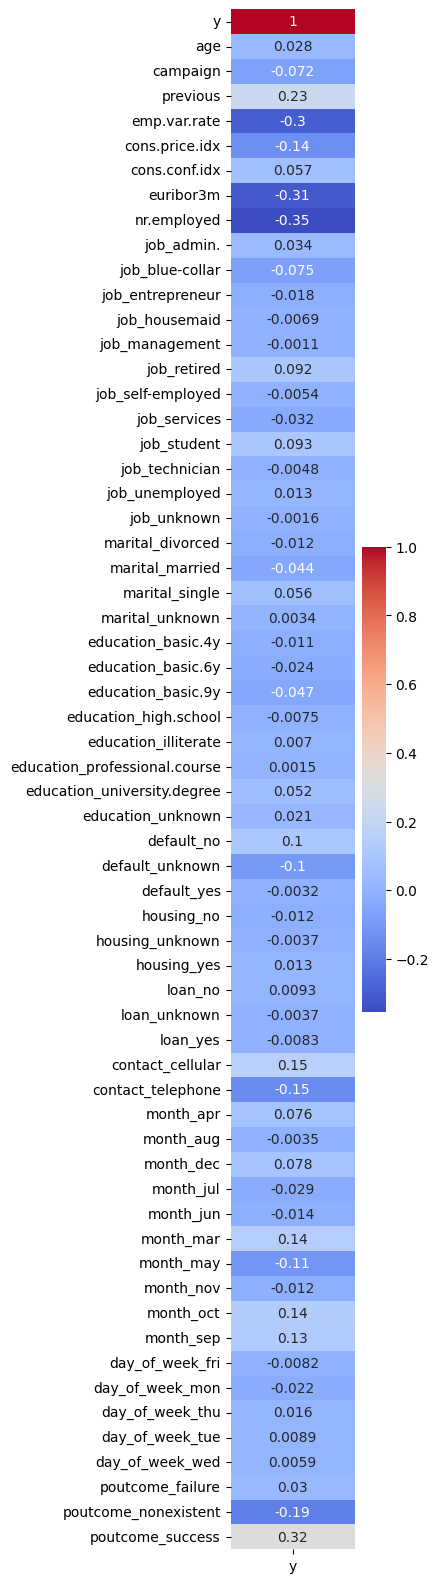

In [26]:
corr_matx_y = pandas.DataFrame(corr_matx['y'])
pyplot.figure(figsize=(2, 20))
seaborn.heatmap(corr_matx_y, annot=True, cmap='coolwarm')

### 1.4.2 Obtenemos el nombre de las columnas con una baja correlación

In [27]:
def get_low_columns(corr_matrix: pandas.DataFrame, upper: float, lower: float) -> list:
  lowcorr_colums = []
  for column, row in corr_matrix.iterrows():
    value = row.iloc[0]
    if (value < upper and value > lower):
      print(f'{column}: {value}')
      lowcorr_colums.append(column)
  return lowcorr_colums

lowcorr_colums = get_low_columns(corr_matx_y, 0.005, -0.005)


job_management: -0.0011072196802892785
job_technician: -0.004751377699163231
job_unknown: -0.001648386634644859
marital_unknown: 0.0033945984195193715
education_professional.course: 0.001464924568031807
default_yes: -0.0031700981952927417
housing_unknown: -0.0036758854942511385
loan_unknown: -0.0036758854942511385
month_aug: -0.003490035690162502


<Axes: >

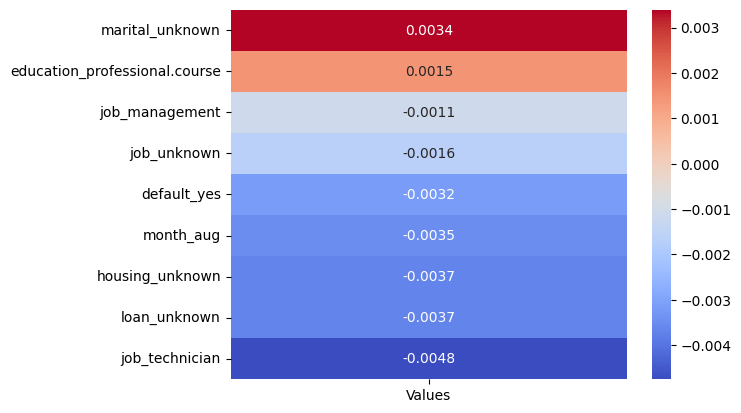

In [57]:
# df_lowcorr_columns = {
#   'job_management': [-0.0011072196802892785],
# 'job_technician': [-0.004751377699163231],
# 'job_unknown': [-0.001648386634644859],
# 'marital_unknown': [0.0033945984195193715],
# 'education_professional.course': [0.001464924568031807],
# 'default_yes': [-0.0031700981952927417],
# 'housing_unknown': [-0.0036758854942511385],
# 'loan_unknown': [-0.0036758854942511385],
# 'month_aug': [-0.003490035690162502]}

lowcorr_columns = {
  'columns':['job_management', 'job_technician', 'job_unknown','marital_unknown','education_professional.course', 'default_yes', 'housing_unknown', 'loan_unknown', 'month_aug'],
  'Values': [-0.0011072196802892785, -0.004751377699163231, -0.001648386634644859, 0.0033945984195193715, 0.001464924568031807, -0.0031700981952927417, -0.0036758854942511385, -0.0036758854942511385, -0.003490035690162502]
}
df = pandas.DataFrame(lowcorr_columns, index=lowcorr_columns['columns']).drop('columns', axis=1)
df = df.sort_values(by='Values', ascending=False)


seaborn.heatmap(df, annot=True, cmap='coolwarm')

### 1.4.3 Eliminando las columnas con baja correlación

In [28]:
#Eliminamos las columnas del DF que menos relación tienen.
final_dataset = normalized_dataset.drop(lowcorr_colums, axis=1)
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39393 entries, 0 to 41187
Data columns (total 53 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   y                            39393 non-null  int64  
 1   age                          39393 non-null  int64  
 2   campaign                     39393 non-null  int64  
 3   previous                     39393 non-null  int64  
 4   emp.var.rate                 39393 non-null  float64
 5   cons.price.idx               39393 non-null  float64
 6   cons.conf.idx                39393 non-null  float64
 7   euribor3m                    39393 non-null  float64
 8   nr.employed                  39393 non-null  float64
 9   job_admin.                   39393 non-null  int32  
 10  job_blue-collar              39393 non-null  int32  
 11  job_entrepreneur             39393 non-null  int32  
 12  job_housemaid                39393 non-null  int32  
 13  job_retired          

## 1.5 Análisis de distribución de la variable a predecir (Y)

<Axes: xlabel='y', ylabel='count'>

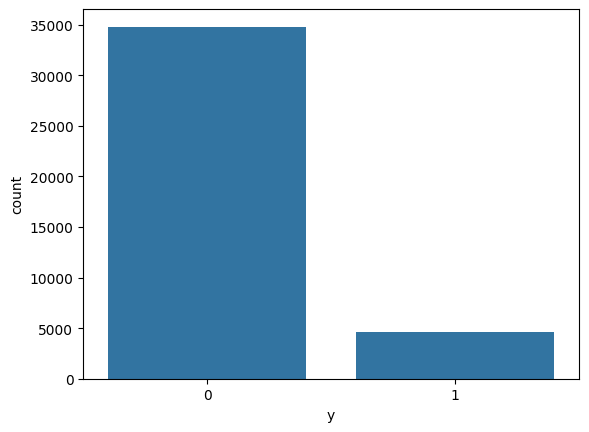

In [29]:
seaborn.countplot(x='y', data=final_dataset)

In [30]:
final_dataset['y'].value_counts()

y
0    34801
1     4592
Name: count, dtype: int64

Conclusión: observamos una importante diferencia entre clases. Tendremos que elegir cuidadosamente la técnica de balanceamiento para no generar muchos valores en la clase minoritaria pero tampoco recortar tanto la clase mayoritaria.

## 1.6 Realizamos un balanceamiento de los datos de la variable a predecir (Y)

### 1.6.1 Ajustamos la clase mayoritaria

In [31]:
from sklearn.model_selection import train_test_split
def class_cutter(dataset: pandas.DataFrame, cut_percent: float) -> pandas.DataFrame:
  dataframe = dataset.copy()
  #Genero el dataframe de la clase minoritaria
  criterio_y = dataframe['y'] == 1
  dataframe_y = dataframe[criterio_y]
  
  #Genero el dataframe de la clase mayoritaria
  criterio_n = dataframe['y'] == 0
  dataframe_n = dataframe[criterio_n]

  #Separo el datafram de la clase mayoritaria en x e y para realizar el recorte
  x_n = dataframe_n.drop('y', axis=1)
  y_n = dataframe_n['y']

  #Defino el % de recorte
  get_percent = 1 - cut_percent

  #Utilizando train_test_split genero un recorte de manera aleatoria de la clase mayoritaria
  x_train, x_test_n, y_train, y_test_n = train_test_split(x_n, y_n, test_size=get_percent, random_state=123) #Utilizo la semilla para que en cada ejecución no haya variación del resultado
  #Vuelvo a unir x_n recortado e y_n recortado
  splited_dataframe_n = pandas.concat([y_test_n, x_test_n], axis=1)

  #Retorno el dataframe de la clase minoritaria concatenada con el dataframe de la clase mayoritaria recortada
  return pandas.concat([dataframe_y, splited_dataframe_n])

splitted_dataset = class_cutter(final_dataset, 0.50)
splitted_dataset

,y,age,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
75,1,41,1,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
83,1,49,1,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
88,1,49,1,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
129,1,41,1,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
139,1,45,1,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31530,0,44,2,0,-1.8,92.893,-46.2,1.327,5099.1,0,...,0,0,0,0,1,0,0,0,1,0
35496,0,34,1,0,-1.8,92.893,-46.2,1.244,5099.1,1,...,0,0,0,1,0,0,0,0,1,0
35591,0,47,1,1,-1.8,92.893,-46.2,1.244,5099.1,0,...,0,0,0,1,0,0,0,1,0,0
13615,0,25,2,0,1.4,93.918,-42.7,4.963,5228.1,1,...,0,0,0,0,1,0,0,0,1,0


<Axes: xlabel='y', ylabel='count'>

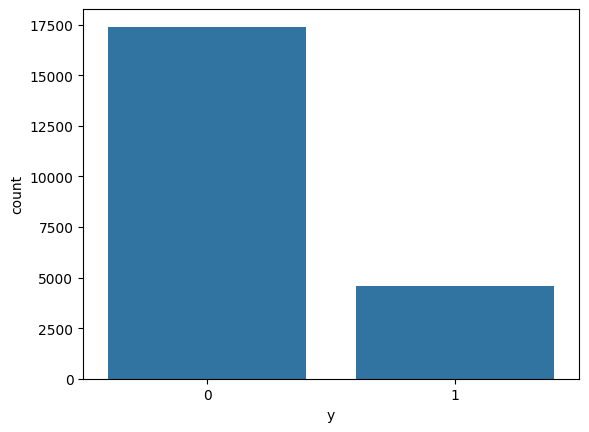

In [32]:
#Grafico el resultado del recorte de la clase mayoritaria
seaborn.countplot(x='y', data=splitted_dataset)

### 1.6.2 Aplicamos SMOTE

<Axes: xlabel='y', ylabel='count'>

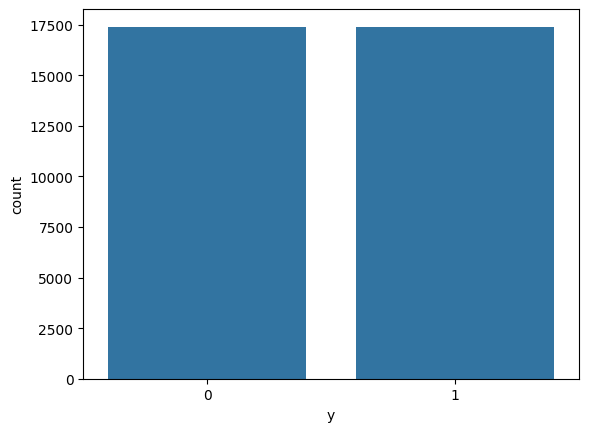

In [34]:
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=123)
x = splitted_dataset.drop('y', axis=1)
y = splitted_dataset['y']
smt_x, smt_y = smt.fit_resample(x, y)

#Graficamos para evaluar el resultado
final_dataset = pandas.concat([smt_x,smt_y], axis=1)
seaborn.countplot(x='y', data=final_dataset)

## 2. Exportamos el dataset final

In [35]:
final_dataset.to_csv('bank-additional-clean.csv', sep=';')